In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
path = '/home/lorenzo/Principal/Doctorado/Noise-Neuron discriminator/Datos/'
data = pd.read_pickle(path + 'PCCIBNMZc')
data = data.drop(columns = ['Bulk'])
df = data.copy()

In [23]:
def Isi_pc(Isi_example,i):
    suma = np.sum(Isi_example)
    if suma == 0: return 0
    else:
        return np.sum(Isi_example[:i])/suma
i = 5
df['ISI_in_band_'+str((i+1)*10)+'Hz'] = data.ISI.apply(Isi_pc,args = (i,))

(-0.1, 15)

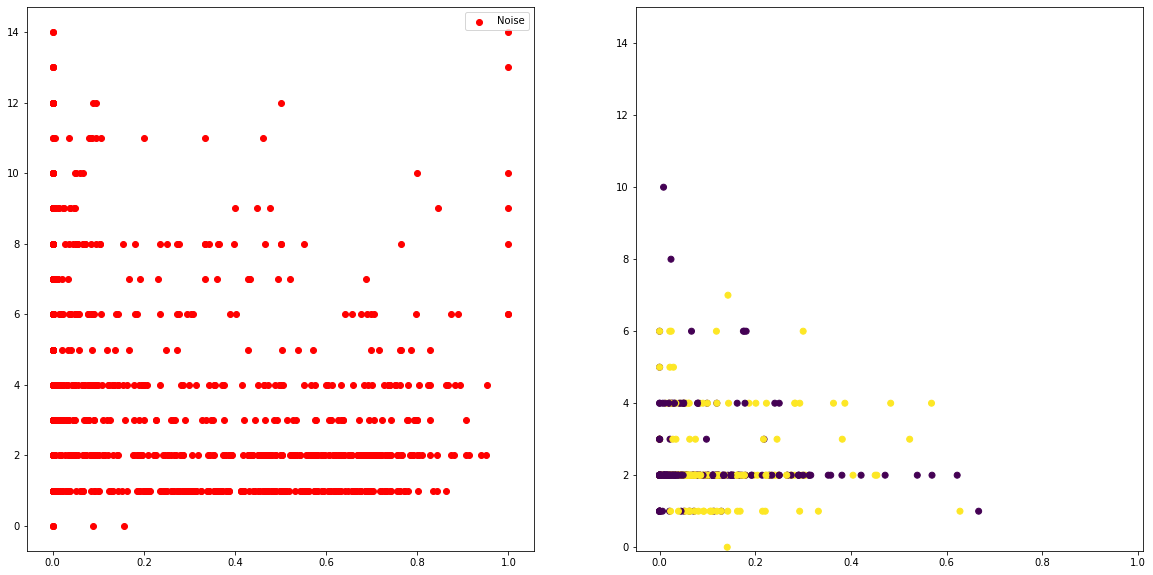

In [36]:
data_exp = df[['ISI_in_band_60Hz','ZeroCrossings','bNoise']]
#data_exp = data_exp[data_exp.bNoise == 1]
fig = plt.figure(1,figsize=(20,10))
axes = fig.subplots(1,2)
noise = data_exp[data_exp.bNoise == 1]
neuron = data_exp[data_exp.bNoise != 1]
axes[0].scatter(noise.ISI_in_band_60Hz.values,y = noise.ZeroCrossings.values,c= 'r',label = 'Noise')
axes[0].legend()
axes[1].scatter(neuron.ISI_in_band_60Hz.values,y = neuron.ZeroCrossings.values,c= neuron.bNoise.values,cmap = 'viridis')
plt.xlim(-0.05,1.01)
plt.ylim(-0.1,np.max(df.ZeroCrossings)+1)

In [58]:
a = np.random.randint(0, len(data_exp),len(data_exp))
train_ind = a[: int(len(a)*70/100)]
test_int = a[int(len(a)*70/100):]
train = df.loc[train_ind]
test = df.loc[test_ind]

(-0.1, 15)

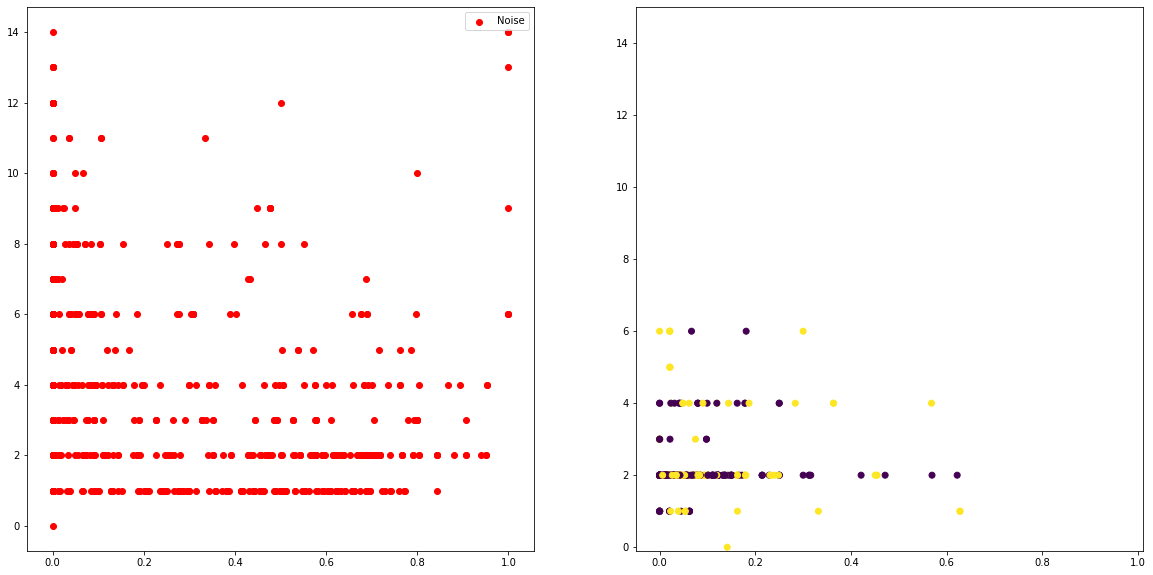

In [59]:
data_exp = train[['ISI_in_band_60Hz','ZeroCrossings','bNoise']]
#data_exp = data_exp[data_exp.bNoise == 1]
fig = plt.figure(1,figsize=(20,10))
axes = fig.subplots(1,2)
noise = data_exp[data_exp.bNoise == 1]
neuron = data_exp[data_exp.bNoise != 1]
axes[0].scatter(noise.ISI_in_band_60Hz.values,y = noise.ZeroCrossings.values,c= 'r',label = 'Noise')
axes[1].scatter(neuron.ISI_in_band_60Hz.values,y = neuron.ZeroCrossings.values,c= neuron.bNoise.values,cmap = 'viridis')
plt.xlim(-0.05,1.01)
plt.ylim(-0.1,np.max(df.ZeroCrossings)+1)

(-0.1, 15)

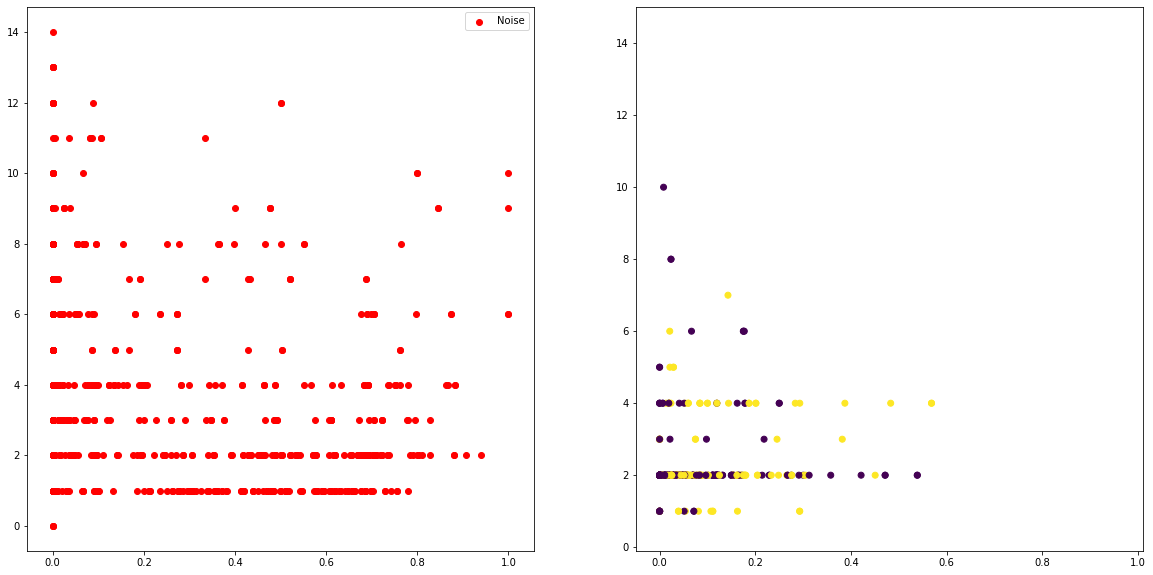

In [60]:
data_exp = test[['ISI_in_band_60Hz','ZeroCrossings','bNoise']]
#data_exp = data_exp[data_exp.bNoise == 1]
fig = plt.figure(1,figsize=(20,10))
axes = fig.subplots(1,2)
noise = data_exp[data_exp.bNoise == 1]
neuron = data_exp[data_exp.bNoise != 1]
axes[0].scatter(noise.ISI_in_band_60Hz.values,y = noise.ZeroCrossings.values,c= 'r',label = 'Noise')
axes[0].legend()
axes[1].scatter(neuron.ISI_in_band_60Hz.values,y = neuron.ZeroCrossings.values,c= neuron.bNoise.values,cmap = 'viridis')
plt.xlim(-0.05,1.01)
plt.ylim(-0.1,np.max(df.ZeroCrossings)+1)

In [116]:
train = train.drop(train.index[train.bNoise.isna()])
train.bNoise = train.bNoise.astype('int')
X = train[['ZeroCrossings','ISI_in_band_60Hz']].values
y = train['bNoise']

In [117]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)


In [129]:
test = test.drop(test.index[test.bNoise.isna()])
test.bNoise = test.bNoise.astype('int')
X = test.loc[test.bNoise == 1][['ISI_in_band_60Hz','ZeroCrossings']].values
y = test.loc[test.bNoise == 1].bNoise.values
LR.predict(X)
round(LR.score(X,y), 4)

/home/lorenzo/.local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.9958

In [130]:
X = test.loc[test.bNoise == 0][['ISI_in_band_60Hz','ZeroCrossings']].values
y = test.loc[test.bNoise == 0].bNoise.values
LR.predict(X)
round(LR.score(X,y), 4)

0.0

In [134]:
LR.coef_

array([[-0.39514424, -3.90845354],
       [ 0.41144769,  4.21038536],
       [-0.23133717, -2.20057198]])

In [125]:
X = test.loc[test.bNoise == 1][['ISI_in_band_60Hz','ZeroCrossings']].values
X

array([[ 0.19548872,  4.        ],
       [ 0.35729847,  1.        ],
       [ 0.07731959,  3.        ],
       ...,
       [ 0.27272727,  5.        ],
       [ 0.03553299, 11.        ],
       [ 0.82751345,  2.        ]])

In [120]:
test

,PatientExperiment,Channel,Cluster,ISI,bNoise,Mean,ZeroCrossings,ISI_in_band_60Hz
1326,HEC022\fanis2\002lfpscr_context_pre,85,3,"[0, 20, 80, 79, 55, 41, 50, 31, 40, 41, 27, 22...",1,"[12.633438728631283, 11.907308506179884, 11.05...",4,0.195489
726,HEC006\novel1,90,1,"[0, 29, 24, 47, 64, 21, 17, 11, 13, 16, 7, 5, ...",1,"[-5.041089763684095, -5.802242098089932, -6.56...",1,0.357298
338,HEC022\fanis2\002lfpscr_context_post,68,2,"[0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",1,"[22.176099191515316, 24.122925861898246, 25.56...",3,0.077320
752,HEC006\novel1,107,1,"[0, 60, 27, 143, 77, 27, 9, 20, 7, 9, 5, 4, 5,...",1,"[2.457058361644353, 3.6672867197367403, 4.8252...",1,0.640919
1467,HEC030\HEC030_rsvpscr2,75,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",1,"[19.47483695127124, 16.437817745203603, 11.241...",1,0.000000
49,HEC017\017context2\017context2_prescr,118,5,"[0, 22, 4, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,...",1,"[-0.35603285569713744, 4.114359554926613, 9.10...",6,0.704545
1039,HEC006\novel8,100,5,"[0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0, ...",1,"[1.0690345824220473, 1.1764133688156224, 1.306...",2,0.038462
525,HEC017\017context1\017context1_postscr,122,3,"[0, 191, 133, 49, 18, 26, 11, 14, 1, 8, 0, 10,...",1,"[9.144933521966628, 7.058238663571797, 4.86830...",2,0.789899
29,HEC016\016context1\016context1,6,3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1,"[3.8047917426499014, 3.997341729252048, 3.8807...",2,0.090909
175,HEC017\017context2\017context2_postscr,100,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[-3.743282025759842, -5.810986340777997, -6.22...",3,0.000000
